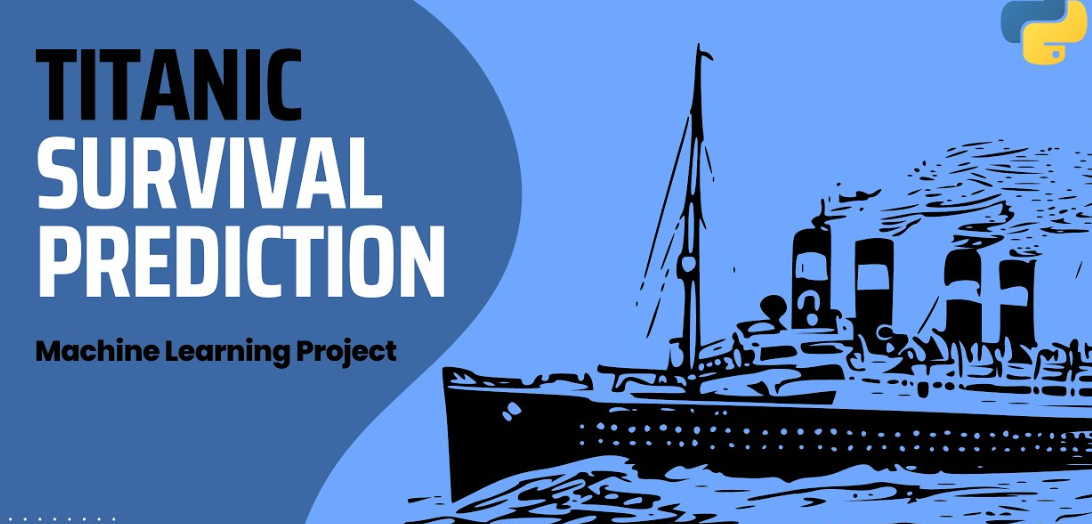

**1. Loading necessary libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

**2. Loading dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS/TitanicSurvivalPrediction/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**3. EDA**

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

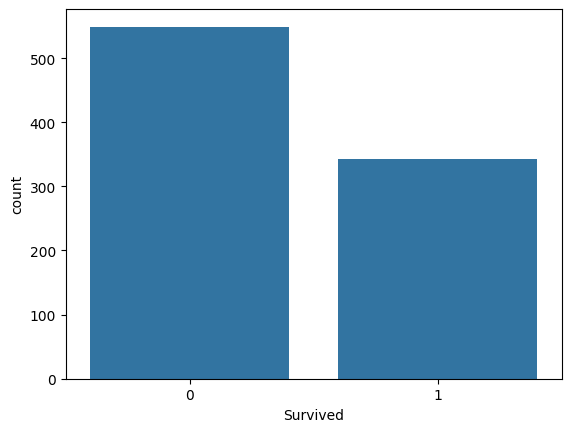

In [ ]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

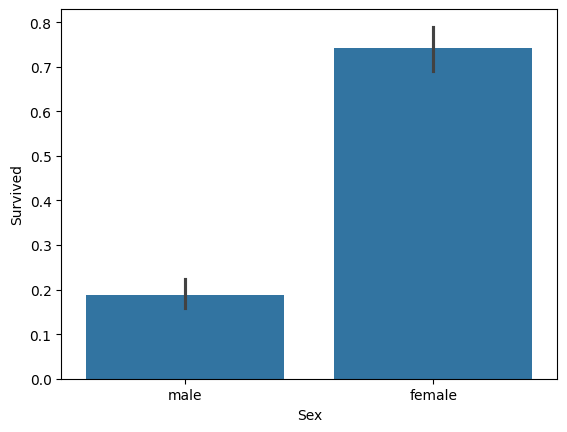

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

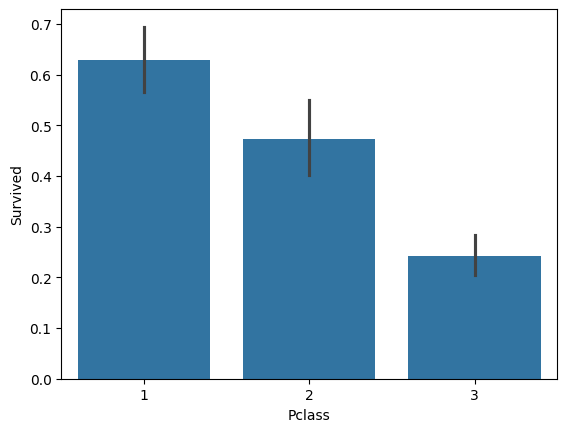

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)

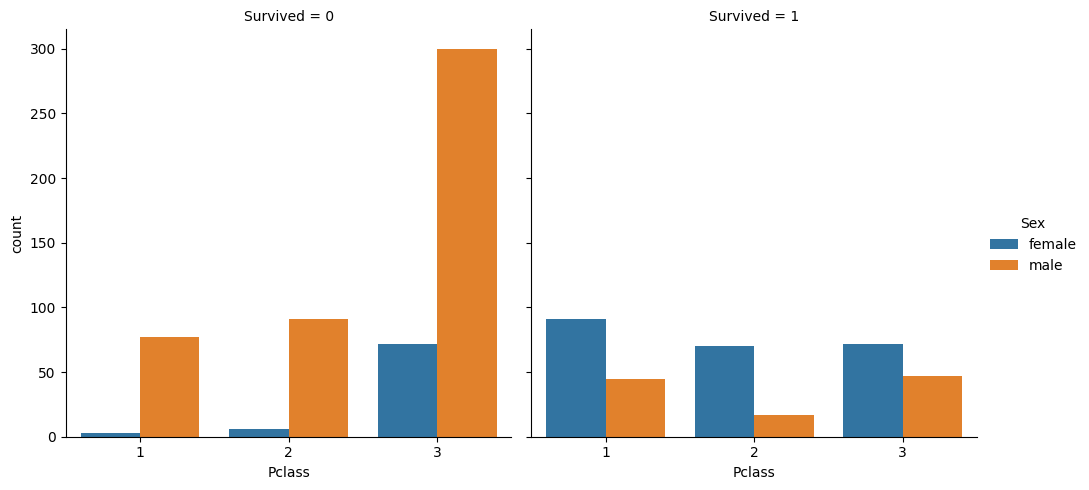

In [ ]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')

<Axes: xlabel='Age', ylabel='Fare'>

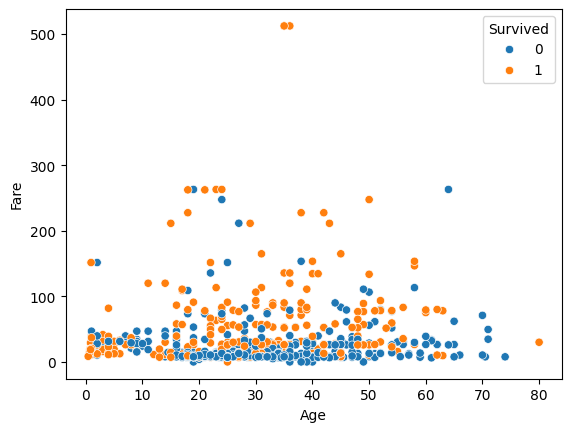

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)

**4. Handling missing values**

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
features=['Age','Embarked']
for feature in features:
  df[feature]=df[feature].fillna(df[feature].mode()[0])

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**5. Changing data types to numeric**

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
encoder=LabelEncoder()
labels=['Sex','Ticket','Embarked']
for label in labels:
  df[label]=encoder.fit_transform(df[label])

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,int64
Fare,float64


**5. Separating features and target**

In [ ]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [ ]:
X=df.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,2
887,1,0,19.0,0,0,14,30.0000,2
888,3,0,24.0,1,2,675,23.4500,2
889,1,1,26.0,0,0,8,30.0000,0


In [ ]:
y=df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


**6. Handling class imbalance**

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
os=SMOTE(random_state=1)
X,y=os.fit_resample(X,y)
y.value_counts()

,count
Survived,
0,549
1,549


**7. Scaling the features**

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

**8. Splitting data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((768, 8), (330, 8), (768,), (330,))

**9. Building models**

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=BernoulliNB()
dec=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       155
           1       0.84      0.81      0.82       175

    accuracy                           0.82       330
   macro avg       0.81      0.82      0.81       330
weighted avg       0.82      0.82      0.82       330

SVC()
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       155
           1       0.87      0.71      0.79       175

    accuracy                           0.79       330
   macro avg       0.80      0.80      0.79       330
weighted avg       0.81      0.79      0.79       330

BernoulliNB()
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       155
           1       0.80      0.78      0.79       175

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       155
           1       0.83      0.86      0.85       175

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       155
           1       0.89      0.86      0.87       175

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=N

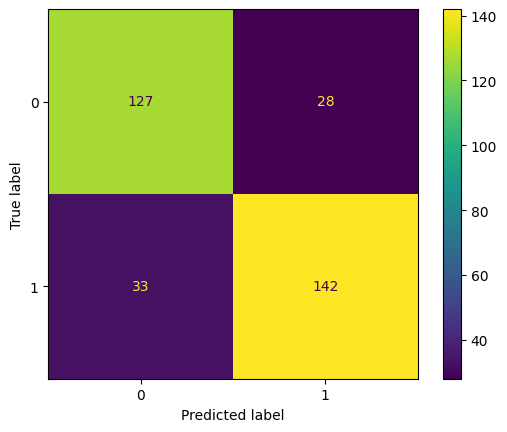

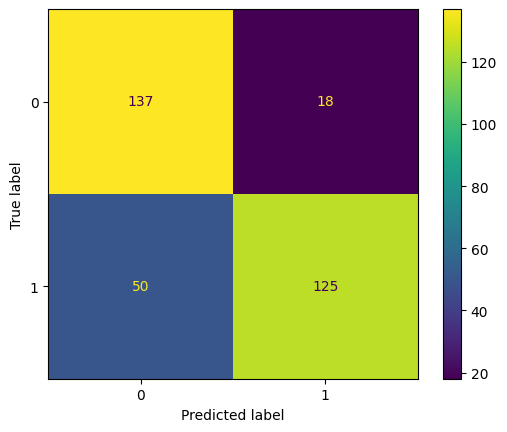

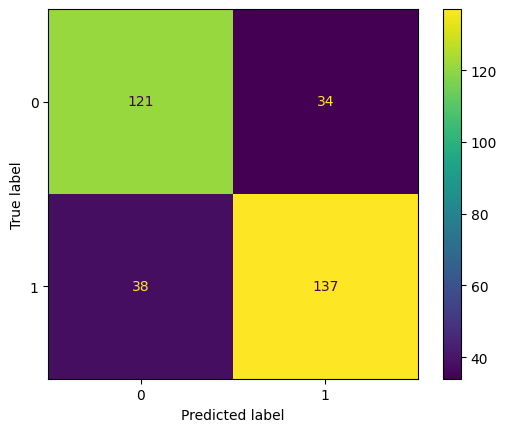

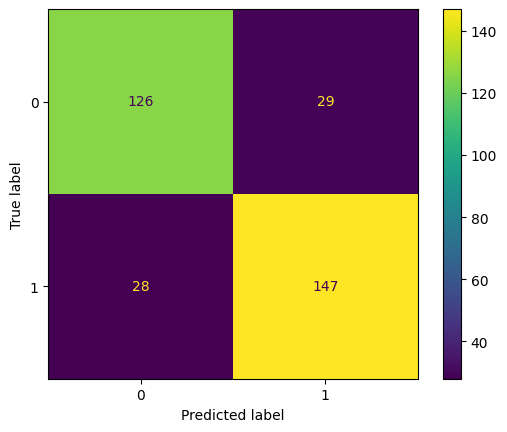

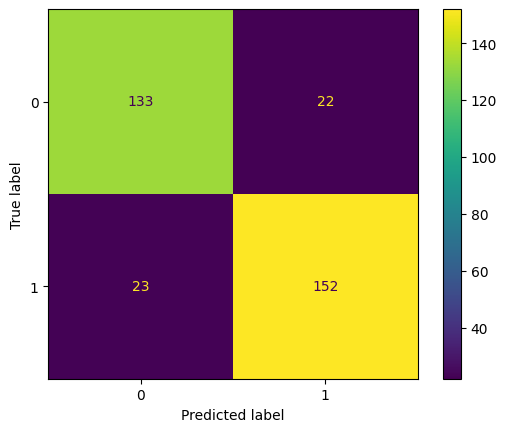

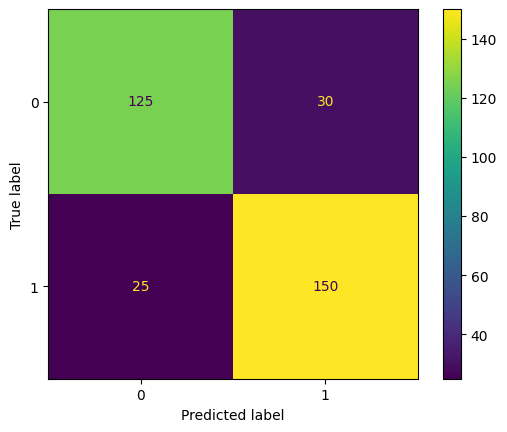

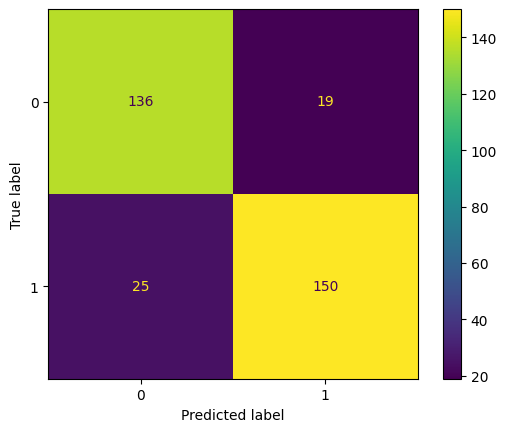

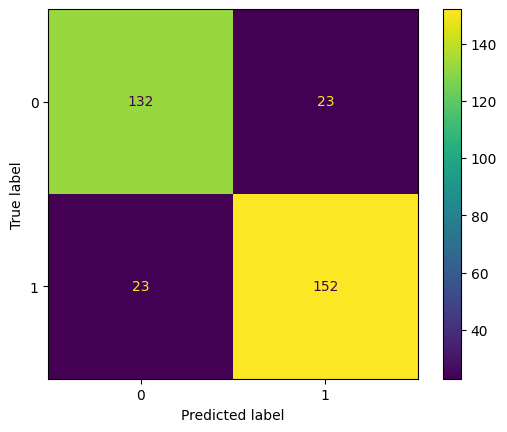

In [ ]:
models=[knn,svc,nb,dec,rf,ab,gb,xg]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**10. Finalizing the model**

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       155
           1       0.88      0.87      0.88       175

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



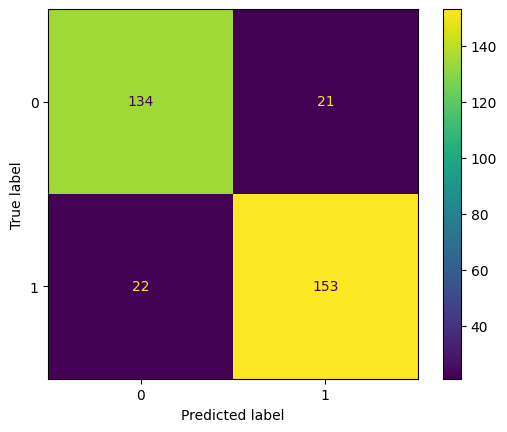

In [ ]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))